In [1]:
import os
os.getcwd()

'C:\\Users\\Admin\\Documents\\Kaggle'

In [2]:
os.chdir('C:\\Users\\Admin\\Documents\\Kaggle')

In [3]:
os.getcwd()

'C:\\Users\\Admin\\Documents\\Kaggle'

In [4]:
import pandas as pd #For Data Crunching
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
import seaborn as sns #For Visualiztion
import matplotlib.pyplot as plt #For tight layout

In [5]:
train = pd.read_csv("C:\\Users\\Admin\\Documents\\Kaggle\\train.csv")
test = pd.read_csv("C:\\Users\\Admin\\Documents\\Kaggle\\test.csv")

In [6]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [7]:
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [8]:
train.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
                 ... 
BedroomAbvGr        0
KitchenAbvGr        0
KitchenQual         0
TotRmsAbvGrd        0
Functional          0
Fireplaces          0
FireplaceQu       690
GarageType         81
GarageYrBlt        81
GarageFinish       81
GarageCars          0
GarageArea          0
GarageQual         81
GarageCond         81
PavedDrive

In [9]:
print(test.describe(include="all"))

                 Id   MSSubClass MSZoning  LotFrontage       LotArea Street  \
count   1459.000000  1459.000000     1455  1232.000000   1459.000000   1459   
unique          NaN          NaN        5          NaN           NaN      2   
top             NaN          NaN       RL          NaN           NaN   Pave   
freq            NaN          NaN     1114          NaN           NaN   1453   
mean    2190.000000    57.378341      NaN    68.580357   9819.161069    NaN   
std      421.321334    42.746880      NaN    22.376841   4955.517327    NaN   
min     1461.000000    20.000000      NaN    21.000000   1470.000000    NaN   
25%     1825.500000    20.000000      NaN    58.000000   7391.000000    NaN   
50%     2190.000000    50.000000      NaN    67.000000   9399.000000    NaN   
75%     2554.500000    70.000000      NaN    80.000000  11517.500000    NaN   
max     2919.000000   190.000000      NaN   200.000000  56600.000000    NaN   

       Alley LotShape LandContour Utilities  ...  S

In [10]:
tr_col_names = list(train.columns)
te_col_names = list(test.columns)

In [11]:
tr_col_num = []
tr_col_cat = []
for i in tr_col_names:
    if train[i].dtype == 'float' or train[i].dtype == 'int':
        tr_col_num.append(i)
    elif train[i].dtype.name == 'category':
        tr_col_cat.append(i)
print(len(tr_col_num))
print(len(tr_col_cat))

3
0


In [12]:
tr_des = train.describe(include = "all")
tr_des.to_csv("C:\\Users\\Admin\\Documents\\Kaggle\\TrainDesc.csv")
te_des = test.describe(include = "all")
te_des.to_csv("C:\\Users\\Admin\\Documents\\Kaggle\\TestDesc.csv")

In [13]:
drop = ["Alley","FireplaceQu","PoolQC","Fence","MiscFeature"]

In [14]:
train = train.drop(columns = drop)
test = test.drop(columns = drop)

In [15]:
tr_des = train.describe(include = "all")
tr_des.to_csv("C:\\Users\\Admin\\Documents\\Kaggle\\TrainDesc1.csv")
te_des = test.describe(include = "all")
te_des.to_csv("C:\\Users\\Admin\\Documents\\Kaggle\\TestDesc1.csv")

In [16]:
print(train.dtypes)

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
BsmtQual          object
                  ...   
BsmtFullBath       int64
BsmtHalfBath       int64
FullBath           int64
HalfBath           int64
BedroomAbvGr       int64
KitchenAbvGr       int64
KitchenQual       object
TotRmsAbvGrd       int64
Functional        object


In [17]:
import statistics
for i in train.columns:
    if train[i].dtypes == 'object':
        train[i].fillna(statistics.mode(train[i]), inplace = True)
    else:
        train[i].fillna(train[i].median(), inplace = True)
for i in test.columns:
    if test[i].dtypes == 'object':
        test[i].fillna(statistics.mode(test[i]), inplace = True)
    else:
        test[i].fillna(test[i].median(), inplace = True)

In [18]:
tr_des = train.describe(include = "all")
tr_des.to_csv("C:\\Users\\Admin\\Documents\\Kaggle\\TrainDesc2.csv")
te_des = test.describe(include = "all")
te_des.to_csv("C:\\Users\\Admin\\Documents\\Kaggle\\TestDesc2.csv")

In [19]:
tr_num = []
for i in train.columns:
    if train[i].dtypes != 'object':
        tr_num.append(i)
tr_num

['Id',
 'MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold',
 'SalePrice']

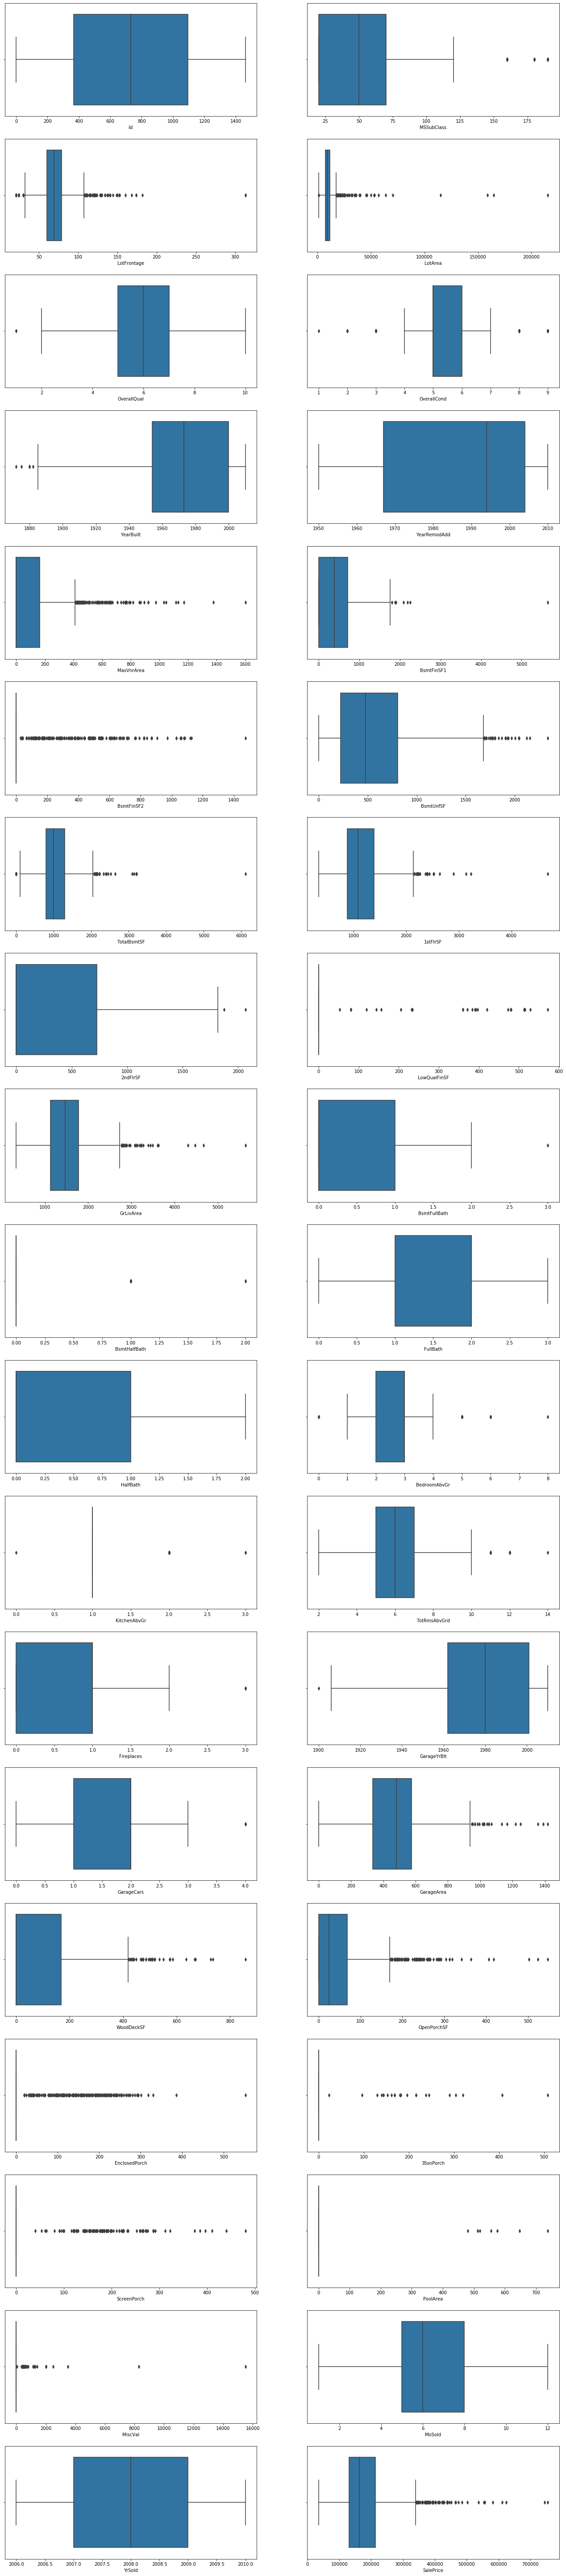

In [20]:
import seaborn as sns
c = 1
plt.figure()
for i in tr_num:
    plt.subplot(19,2,c)
    sns.boxplot(train[i])
    c += 1
plt.subplots_adjust(right = 3,top = 20)
plt.show()

In [21]:
print(train.shape)

(1460, 76)


In [22]:
train_corr = train.corr(method = "pearson")
train_corr.to_csv("train_corr.csv")

In [23]:
train = train.drop(columns = ["GarageArea"])

In [24]:
train_corr = train.corr(method = "pearson")
train_corr.to_csv("train_corr1.csv")

In [25]:
drop_cols = ["BsmtFinSF2","LowQualFinSF","BsmtHalfBath","KitchenAbvGr","EnclosedPorch","3SsnPorch","ScreenPorch","PoolArea","MiscVal"]

In [26]:
train = train.drop(columns = drop_cols)

In [27]:
train_corr = train.corr(method = "pearson")
train_corr.to_csv("train_corr1.csv")

In [28]:
drop_cor = ["MSSubClass","OverallCond","MoSold","YrSold"]
train = train.drop(columns = drop_cor)

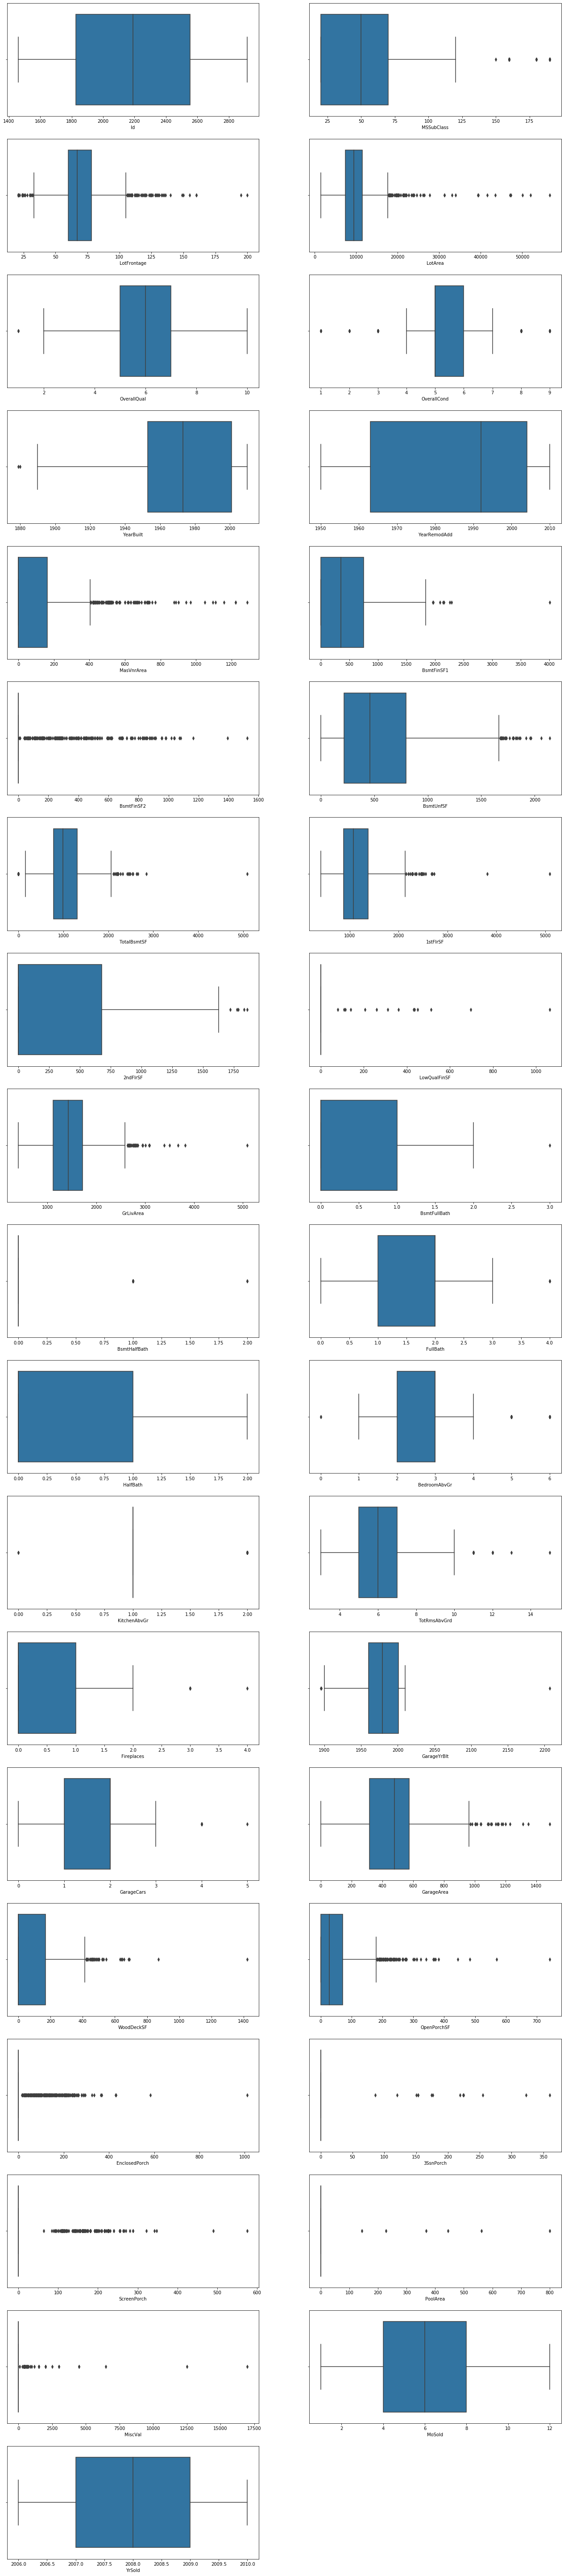

In [29]:
te_num = []
for i in test.columns:
    if test[i].dtypes != 'object':
        te_num.append(i)
import seaborn as sns
c = 1
plt.figure()
for i in te_num:
    plt.subplot(19,2,c)
    sns.boxplot(test[i])
    c += 1
plt.subplots_adjust(right = 3,top = 20)
plt.show()

In [30]:
drop_cols = ["BsmtFinSF2","LowQualFinSF","BsmtHalfBath","KitchenAbvGr","EnclosedPorch","3SsnPorch","ScreenPorch","PoolArea","MiscVal"]

In [31]:
test = test.drop(columns = drop_cols)
drop_cor = ["MSSubClass","OverallCond","MoSold","YrSold"]
test = test.drop(columns = drop_cor)

In [32]:
tr_num = []
for i in train.columns:
    if train[i].dtypes != 'object':
        tr_num.append(i)

tr_num

['Id',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'GrLivArea',
 'BsmtFullBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'WoodDeckSF',
 'OpenPorchSF',
 'SalePrice']

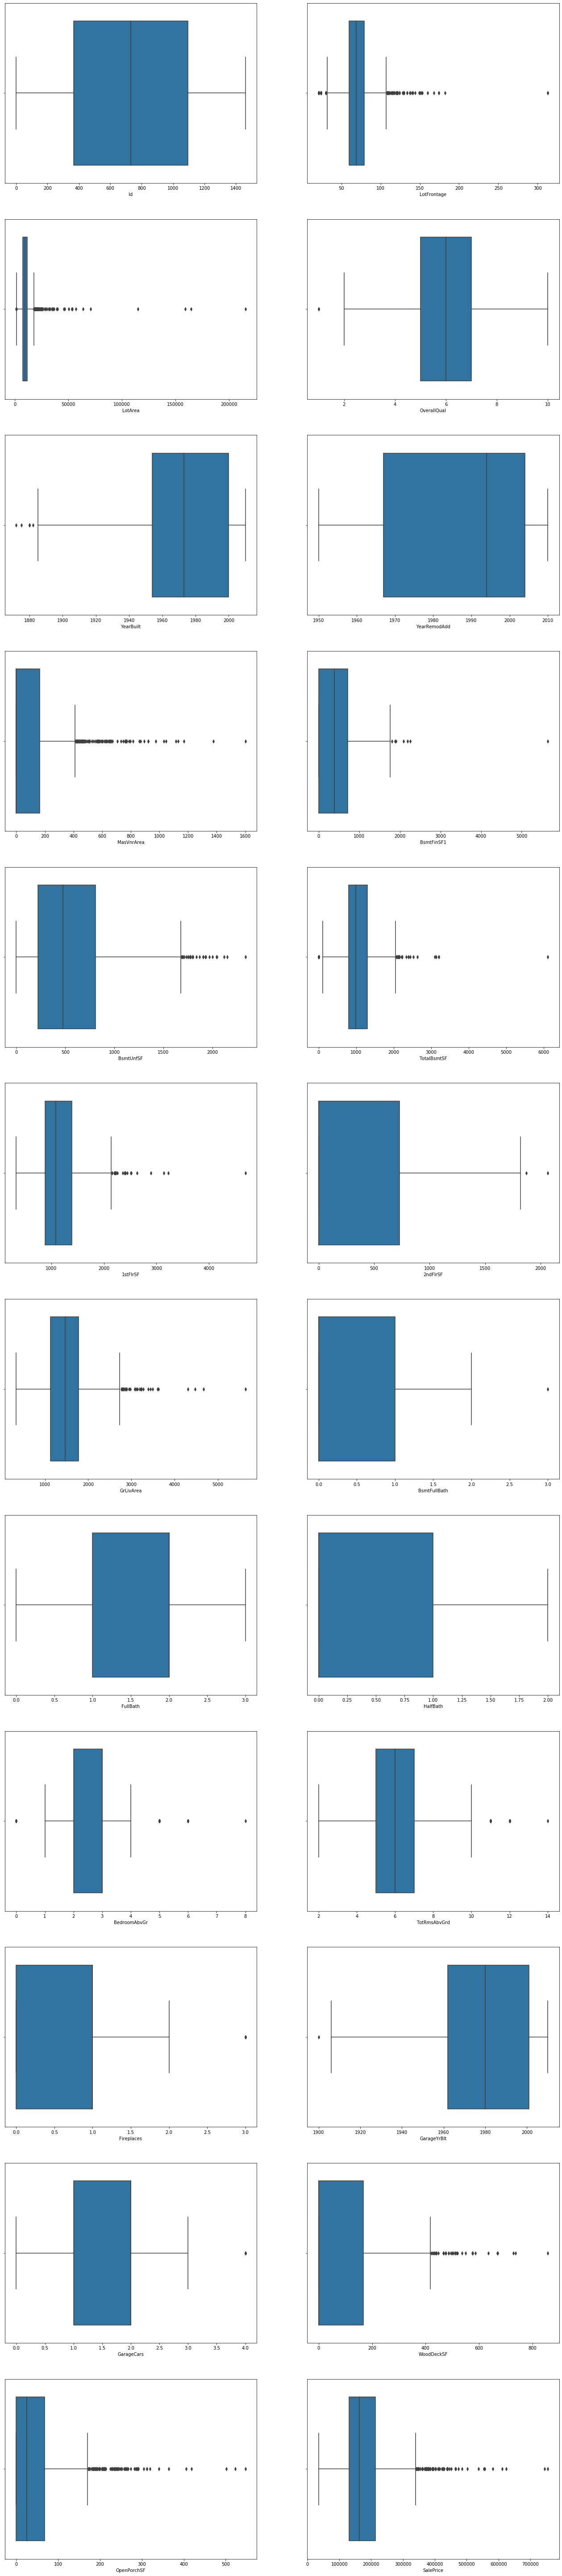

In [33]:
import seaborn as sns
c = 1
plt.figure()
for i in tr_num:
    plt.subplot(12,2,c)
    sns.boxplot(train[i])
    c += 1
plt.subplots_adjust(right = 3,top = 20)
plt.show()

In [34]:
test = test.drop(columns = ["GarageArea"])

In [35]:
te_num = []
for i in test.columns:
    if test[i].dtypes != 'object':
        te_num.append(i)

te_num

['Id',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'GrLivArea',
 'BsmtFullBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'WoodDeckSF',
 'OpenPorchSF']

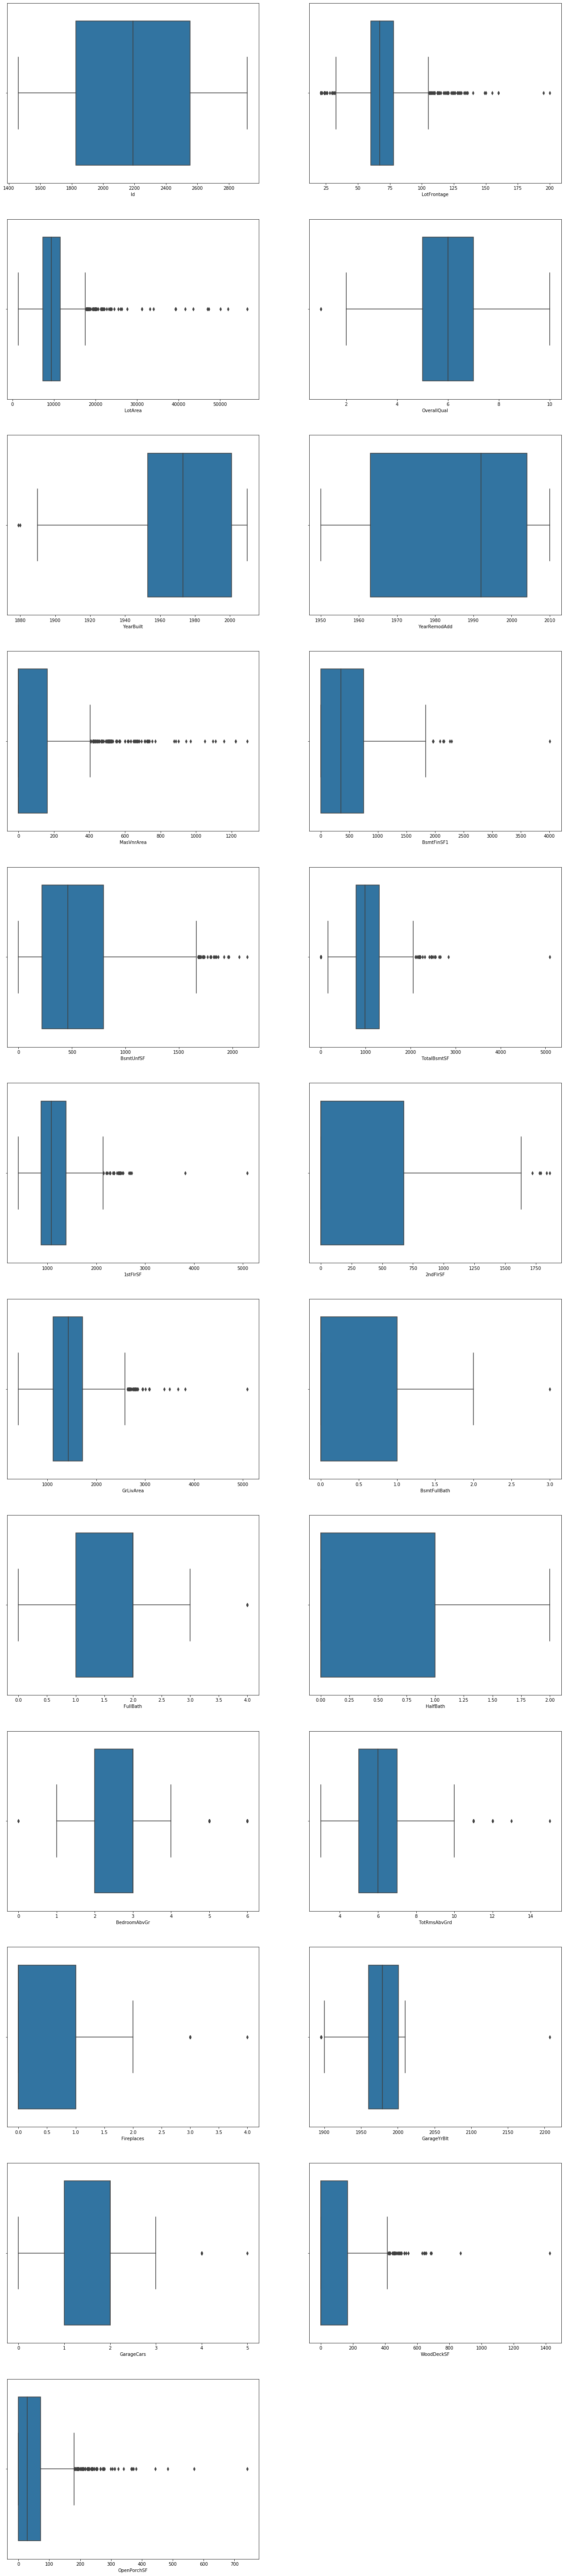

In [36]:
import seaborn as sns
c = 1
plt.figure()
for i in te_num:
    plt.subplot(12,2,c)
    sns.boxplot(test[i])
    c += 1
plt.subplots_adjust(right = 3,top = 20)
plt.show()

In [37]:
p25 = []
p75 = []
iqr = []
iqrll = []
iqrul = []
for i in tr_num:
    p25.append(train[i].quantile(q=0.25))
    p75.append(train[i].quantile(q=0.75))

for i in range(24):
    iqr.append(p75[i]-p25[i])
    
for i in range(24):
    iqrll.append(p25[i]-1.5*iqr[i])
    iqrul.append(p75[i]+1.5*iqr[i])

j = 0
for i in tr_num:
    train.loc[train[i]>iqrul[j],i] = train[i].quantile(q=0.985)
    train.loc[train[i]<iqrll[j],i] = train[i].quantile(q=0.015)
    j += 1

In [38]:
p25 = []
p75 = []
iqr = []
iqrll = []
iqrul = []
for i in te_num:
    p25.append(test[i].quantile(q=0.25))
    p75.append(test[i].quantile(q=0.75))

for i in range(23):
    iqr.append(p75[i]-p25[i])
    
for i in range(23):
    iqrll.append(p25[i]-1.5*iqr[i])
    iqrul.append(p75[i]+1.5*iqr[i])

j = 0
for i in te_num:
    test.loc[test[i]>iqrul[j],i] = test[i].quantile(q=0.985)
    test.loc[test[i]<iqrll[j],i] = test[i].quantile(q=0.015)
    j += 1

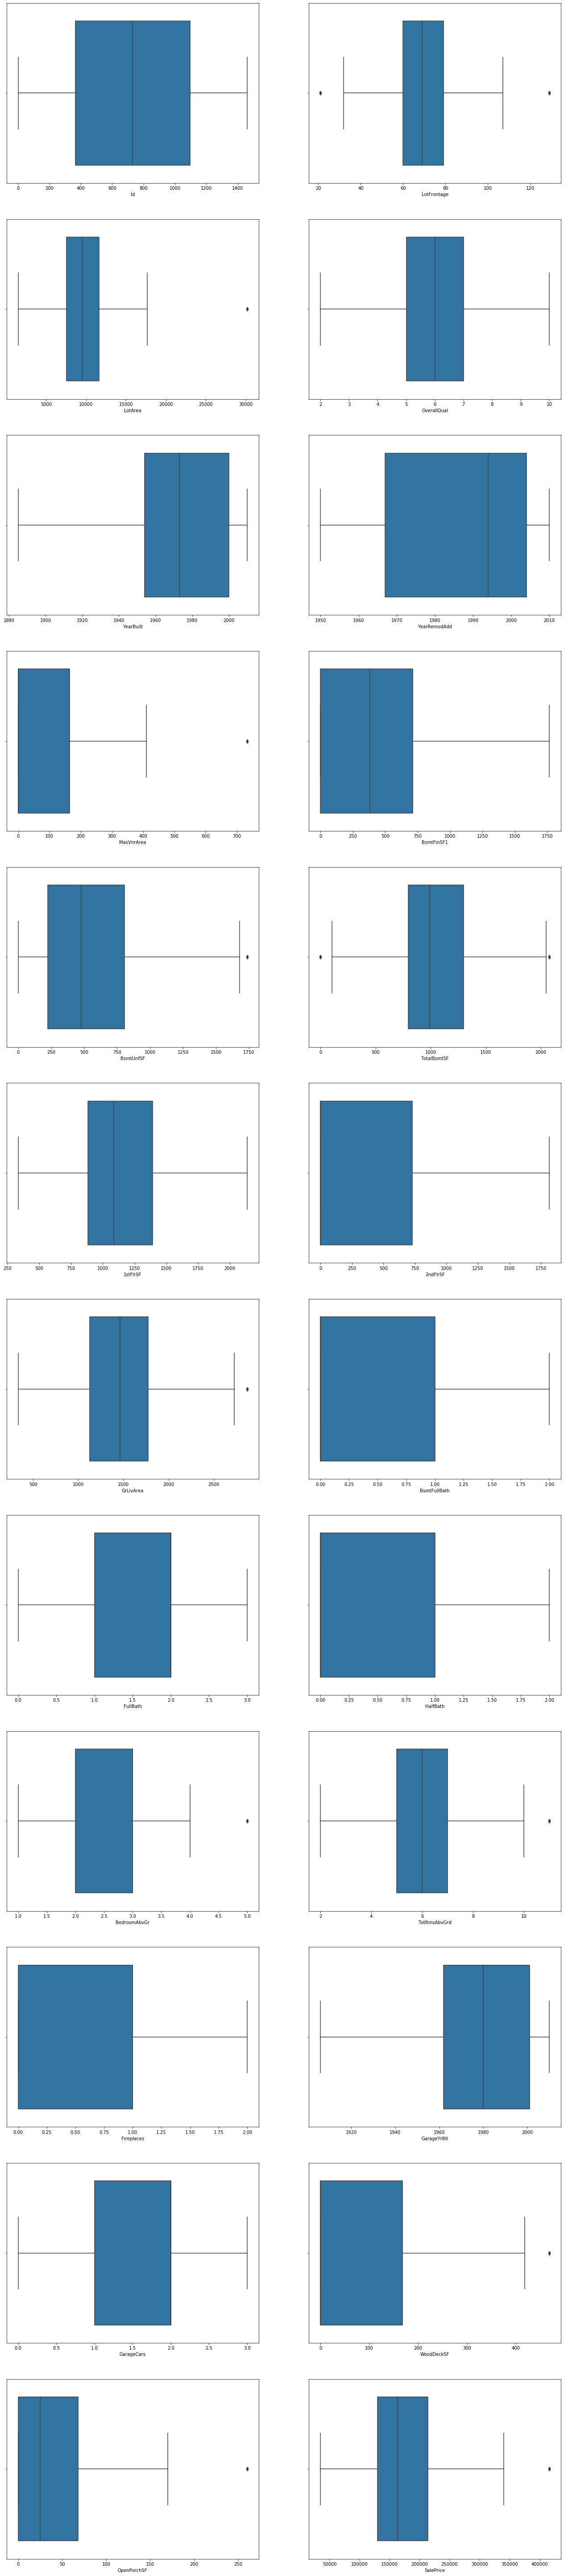

In [39]:
import seaborn as sns
c = 1
plt.figure()
for i in tr_num:
    plt.subplot(12,2,c)
    sns.boxplot(train[i])
    c += 1
plt.subplots_adjust(right = 3,top = 20)
plt.show()

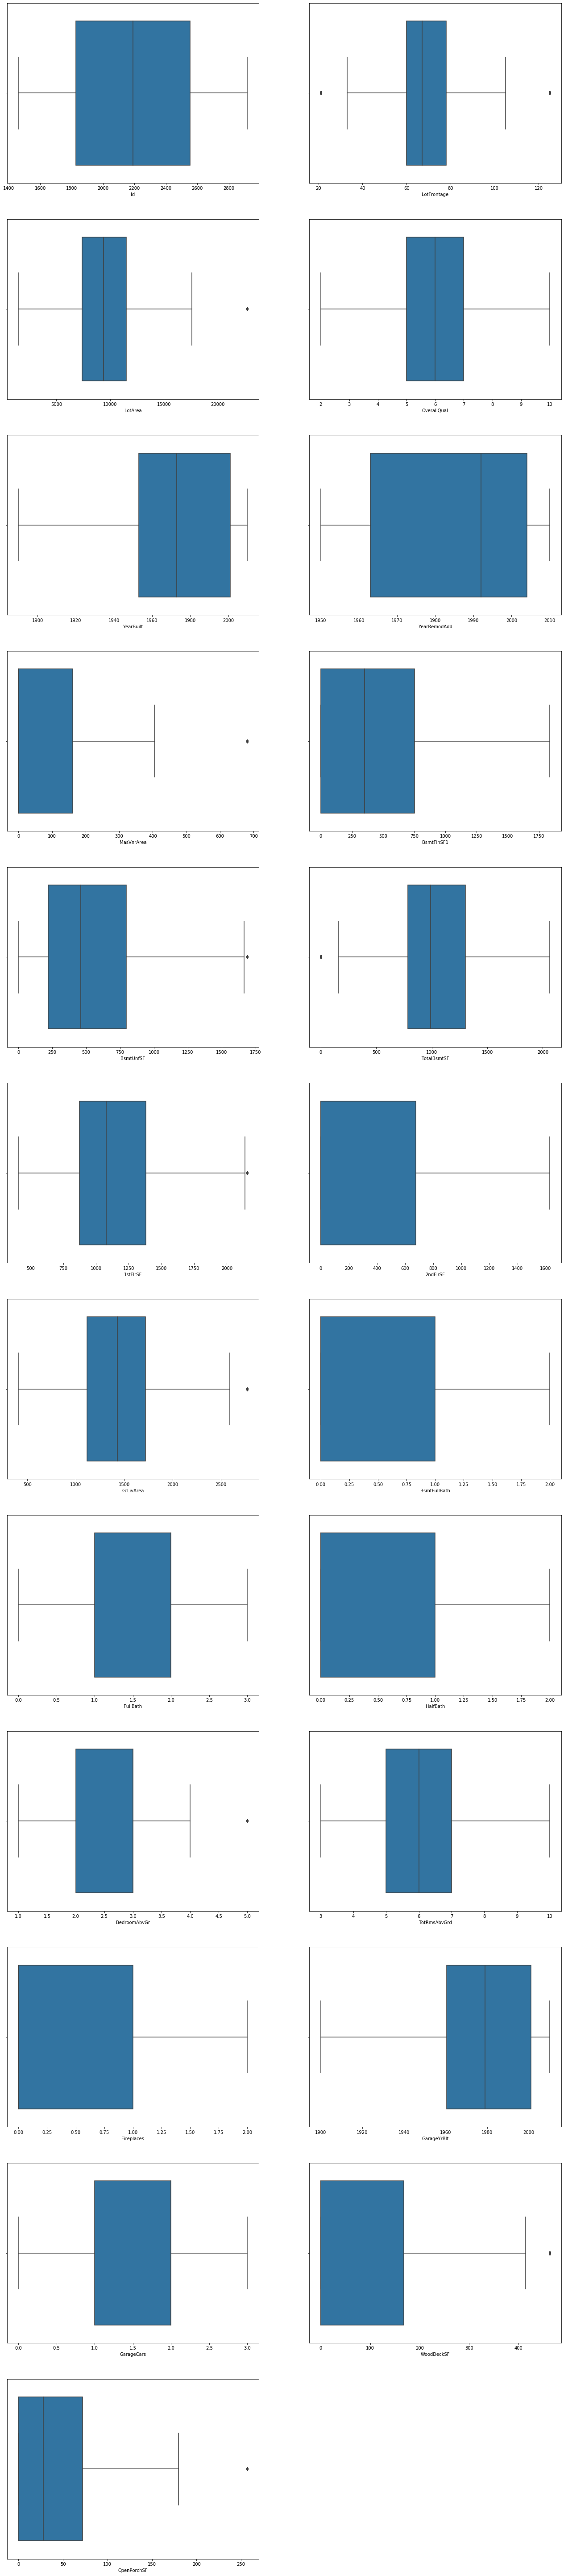

In [40]:
import seaborn as sns
c = 1
plt.figure()
for i in te_num:
    plt.subplot(12,2,c)
    sns.boxplot(test[i])
    c += 1
plt.subplots_adjust(right = 3,top = 20)
plt.show()

In [41]:
tr_des = train.describe(include = "all")
tr_des.to_csv("C:\\Users\\Admin\\Documents\\Kaggle\\TrainDesc3.csv")
te_des = test.describe(include = "all")
te_des.to_csv("C:\\Users\\Admin\\Documents\\Kaggle\\TestDesc3.csv")

In [42]:
train.drop(["Utilities"], axis = 1, inplace = True)
test.drop(["Utilities"], axis = 1, inplace = True)

In [43]:
tr_des = train.describe(include = "all")
tr_des.to_csv("C:\\Users\\Admin\\Documents\\Kaggle\\TrainDesc4.csv")
te_des = test.describe(include = "all")
te_des.to_csv("C:\\Users\\Admin\\Documents\\Kaggle\\TestDesc4.csv")

In [44]:
diff_cat = ["Condition2","HouseStyle","RoofMatl","Exterior1st","Exterior2nd","Heating","Electrical","GarageQual"]
for i in diff_cat:
    print(train[i].value_counts(),test[i].value_counts(),sep = "\n")

Norm      1445
Feedr        6
RRNn         2
Artery       2
PosN         2
RRAe         1
RRAn         1
PosA         1
Name: Condition2, dtype: int64
Norm      1444
Feedr        7
Artery       3
PosA         3
PosN         2
Name: Condition2, dtype: int64
1Story    726
2Story    445
1.5Fin    154
SLvl       65
SFoyer     37
1.5Unf     14
2.5Unf     11
2.5Fin      8
Name: HouseStyle, dtype: int64
1Story    745
2Story    427
1.5Fin    160
SLvl       63
SFoyer     46
2.5Unf     13
1.5Unf      5
Name: HouseStyle, dtype: int64
CompShg    1434
Tar&Grv      11
WdShngl       6
WdShake       5
Membran       1
ClyTile       1
Roll          1
Metal         1
Name: RoofMatl, dtype: int64
CompShg    1442
Tar&Grv      12
WdShake       4
WdShngl       1
Name: RoofMatl, dtype: int64
VinylSd    515
HdBoard    222
MetalSd    220
Wd Sdng    206
Plywood    108
CemntBd     61
BrkFace     50
WdShing     26
Stucco      25
AsbShng     20
BrkComm      2
Stone        2
AsphShn      1
ImStucc      1
CBlock     

In [45]:
import statistics

In [46]:
drop_more = []
for i in diff_cat:
    if list(train[i]).count(statistics.mode(train[i])) > 0.8*train[i].count():
        drop_more.append(i)

In [47]:
train = train.drop(columns = drop_more)
test = test.drop(columns = drop_more)

In [48]:
diff_cat1 = ["HouseStyle","Exterior1st","Exterior2nd"]

In [49]:
for i in diff_cat1:
    print(train[i].value_counts(),test[i].value_counts(),sep = "\n")

1Story    726
2Story    445
1.5Fin    154
SLvl       65
SFoyer     37
1.5Unf     14
2.5Unf     11
2.5Fin      8
Name: HouseStyle, dtype: int64
1Story    745
2Story    427
1.5Fin    160
SLvl       63
SFoyer     46
2.5Unf     13
1.5Unf      5
Name: HouseStyle, dtype: int64
VinylSd    515
HdBoard    222
MetalSd    220
Wd Sdng    206
Plywood    108
CemntBd     61
BrkFace     50
WdShing     26
Stucco      25
AsbShng     20
BrkComm      2
Stone        2
AsphShn      1
ImStucc      1
CBlock       1
Name: Exterior1st, dtype: int64
VinylSd    511
MetalSd    230
HdBoard    220
Wd Sdng    205
Plywood    113
CemntBd     65
BrkFace     37
WdShing     30
AsbShng     24
Stucco      18
BrkComm      4
AsphShn      1
CBlock       1
Name: Exterior1st, dtype: int64
VinylSd    504
MetalSd    214
HdBoard    207
Wd Sdng    197
Plywood    142
CmentBd     60
Wd Shng     38
Stucco      26
BrkFace     25
AsbShng     20
ImStucc     10
Brk Cmn      7
Stone        5
AsphShn      3
Other        1
CBlock       1
Name

In [50]:
for i in ["SLvl","SFoyer","1.5Unf","2.5Unf","2.5Fin"]:
    train["HouseStyle"].loc[train["HouseStyle"] == i] = "Others"
for i in ["SLvl","SFoyer","1.5Unf","2.5Unf"]:
    test["HouseStyle"].loc[test["HouseStyle"] == i] = "Others"

C:\Users\Admin\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [51]:
for i in ["CemntBd","BrkFace","WdShing","Stucco","AsbShng","BrkComm","Stone","CBlock","ImStucc","AsphShn"]:
    train["Exterior1st"].loc[train["Exterior1st"] == i] = "Others"
for i in ["CemntBd","BrkFace","WdShing","Stucco","AsbShng","BrkComm","CBlock","AsphShn"]:
    test["Exterior1st"].loc[test["Exterior1st"] == i] = "Others"

In [52]:
for i in ["CemntBd","BrkFace","WdShing","Stucco","AsbShng","BrkComm","Stone","CBlock","ImStucc","AsphShn","Brk Cmn","Other"]:
    train["Exterior2nd"].loc[train["Exterior2nd"] == i] = "Others"
for i in ["CemntBd","BrkFace","WdShing","Stucco","AsbShng","BrkComm","Stone","CBlock","ImStucc","AsphShn","Brk Cmn"]:
    test["Exterior2nd"].loc[test["Exterior2nd"] == i] = "Others"

In [53]:
cat_var = []
for i in train.columns:
    if train[i].dtypes == 'object':
        cat_var.append(i)
dummies = []
for i in cat_var:
    dummies.append(pd.get_dummies(train[i], prefix = i).iloc[:, 1:])
j=0
for i in cat_var:
    train = pd.concat([train, dummies[j]], axis = 1)
    j += 1
train.drop(cat_var, axis = 1, inplace = True)
train.describe(include = "all")

,Id,LotFrontage,LotArea,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,69.599315,10221.371599,6.102055,1971.371233,1984.865753,111.042185,438.513733,564.782212,1049.603260,...,0.003425,0.003425,0.083562,0.002055,0.867808,0.002740,0.008219,0.013699,0.820548,0.085616
std,421.610009,20.256115,5381.212757,1.374843,29.919366,20.645407,195.908501,429.133142,434.371446,401.727218,...,0.058440,0.058440,0.276824,0.045299,0.338815,0.052289,0.090317,0.116277,0.383862,0.279893
min,1.000000,21.000000,1491.000000,2.000000,1885.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,365.750000,60.000000,7553.500000,5.000000,1954.000000,1967.000000,0.000000,0.000000,223.000000,795.750000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,730.500000,69.000000,9478.500000,6.000000,1973.000000,1994.000000,0.000000,383.500000,477.500000,991.500000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,1095.250000,79.000000,11601.500000,7.000000,2000.000000,2004.000000,164.250000,712.250000,808.000000,1298.250000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1460.000000,129.000000,30167.265000,10.000000,2010.000000,2010.000000,732.955000,1767.000000,1736.070000,2077.115000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [54]:
cat_var = []
for i in test.columns:
    if test[i].dtypes == 'object':
        cat_var.append(i)
dummies = []
for i in cat_var:
    dummies.append(pd.get_dummies(test[i], prefix = i).iloc[:, 1:])
j=0
for i in cat_var:
    test = pd.concat([test, dummies[j]], axis = 1)
    j += 1
test.drop(cat_var, axis = 1, inplace = True)
test.describe(include = "all")

,Id,LotFrontage,LotArea,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
count,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,...,1459.000000,1459.000000,1459.000000,1459.000000,1459.00000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000
mean,2190.000000,68.302262,9712.333653,6.081563,1971.385881,1983.662783,105.821275,434.826936,552.227485,1039.446333,...,0.002742,0.002056,0.080192,0.002742,0.86292,0.005483,0.008225,0.017820,0.825223,0.082248
std,421.321334,20.779027,4192.324590,1.429000,30.314444,21.130467,187.463838,437.858765,431.314076,417.505980,...,0.052306,0.045314,0.271683,0.052306,0.34405,0.073871,0.090348,0.132344,0.379907,0.274837
min,1461.000000,21.000000,1470.000000,2.000000,1890.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1825.500000,60.000000,7391.000000,5.000000,1953.000000,1963.000000,0.000000,0.000000,219.500000,784.000000,...,0.000000,0.000000,0.000000,0.000000,1.00000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,2190.000000,67.000000,9399.000000,6.000000,1973.000000,1992.000000,0.000000,350.500000,460.000000,988.000000,...,0.000000,0.000000,0.000000,0.000000,1.00000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,2554.500000,78.000000,11517.500000,7.000000,2001.000000,2004.000000,162.000000,752.000000,797.500000,1304.000000,...,0.000000,0.000000,0.000000,0.000000,1.00000,0.000000,0.000000,0.000000,1.000000,0.000000
max,2919.000000,125.000000,22771.430000,10.000000,2010.000000,2010.000000,681.560000,1836.000000,1689.650000,2062.000000,...,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000


In [55]:
train_corr2 = train.corr(method = "pearson")
train_corr2.to_csv("train_corr2.csv")

In [56]:
drop = ["BedroomAbvGr","MSZoning_FV","MSZoning_RH","MSZoning_RL","MSZoning_RM","Street_Pave","LotShape_IR2","LotShape_IR3","LotShape_Reg","LandContour_HLS","LandContour_Low","LandContour_Lvl","LotConfig_CulDSac","LotConfig_FR2","LotConfig_FR3","LotConfig_Inside","LandSlope_Mod","LandSlope_Sev","Neighborhood_Blueste","Neighborhood_BrDale","Neighborhood_BrkSide","Neighborhood_ClearCr","Neighborhood_CollgCr","Neighborhood_Crawfor","Neighborhood_Edwards","Neighborhood_Gilbert","Neighborhood_IDOTRR","Neighborhood_MeadowV","Neighborhood_Mitchel","Neighborhood_NAmes","Neighborhood_NPkVill","Neighborhood_NWAmes","Neighborhood_NoRidge","Neighborhood_NridgHt","Neighborhood_OldTown","Neighborhood_SWISU","Neighborhood_Sawyer","Neighborhood_SawyerW","Neighborhood_Somerst","Neighborhood_StoneBr","Neighborhood_Timber","Neighborhood_Veenker","Condition1_Feedr","Condition1_Norm","Condition1_PosA","Condition1_PosN","Condition1_RRAe","Condition1_RRAn","Condition1_RRNe","Condition1_RRNn","BldgType_2fmCon","BldgType_Duplex","BldgType_Twnhs","BldgType_TwnhsE","HouseStyle_1Story","HouseStyle_2Story","HouseStyle_Others","RoofStyle_Gable","RoofStyle_Gambrel","RoofStyle_Hip","RoofStyle_Mansard","RoofStyle_Shed","Exterior1st_MetalSd","Exterior1st_Others","Exterior1st_Plywood","Exterior1st_VinylSd","Exterior1st_Wd Sdng","Exterior2nd_HdBoard","Exterior2nd_MetalSd","Exterior2nd_Others","Exterior2nd_Plywood","Exterior2nd_VinylSd","Exterior2nd_Wd Sdng","Exterior2nd_Wd Shng","MasVnrType_BrkFace","MasVnrType_None","MasVnrType_Stone","ExterQual_Fa","ExterQual_Gd","ExterQual_TA","ExterCond_Fa","ExterCond_Gd","ExterCond_Po","ExterCond_TA","Foundation_CBlock","Foundation_PConc","Foundation_Slab","Foundation_Stone","Foundation_Wood","BsmtQual_Fa","BsmtQual_Gd","BsmtQual_TA","BsmtCond_Gd","BsmtCond_Po","BsmtCond_TA","BsmtExposure_Gd","BsmtExposure_Mn","BsmtExposure_No","BsmtFinType1_BLQ","BsmtFinType1_GLQ","BsmtFinType1_LwQ","BsmtFinType1_Rec","BsmtFinType1_Unf","BsmtFinType2_BLQ","BsmtFinType2_GLQ","BsmtFinType2_LwQ","BsmtFinType2_Rec","BsmtFinType2_Unf","HeatingQC_Fa","HeatingQC_Gd","HeatingQC_Po","HeatingQC_TA","CentralAir_Y","KitchenQual_Fa","KitchenQual_Gd","KitchenQual_TA","Functional_Maj2","Functional_Min1","Functional_Min2","Functional_Mod","Functional_Sev","Functional_Typ","GarageType_Attchd","GarageType_Basment","GarageType_BuiltIn","GarageType_CarPort","GarageType_Detchd","GarageFinish_RFn","GarageFinish_Unf","GarageCond_Fa","GarageCond_Gd","GarageCond_Po","GarageCond_TA","PavedDrive_P","PavedDrive_Y","SaleType_CWD","SaleType_Con","SaleType_ConLD","SaleType_ConLI","SaleType_ConLw","SaleType_New","SaleType_Oth","SaleType_WD","SaleCondition_AdjLand","SaleCondition_Alloca","SaleCondition_Family","SaleCondition_Normal","SaleCondition_Partial"]

In [57]:
train.drop(columns = drop,axis = 1,inplace = True)
test.drop(columns = drop,axis = 1,inplace = True)

In [58]:
train.describe()

,Id,LotFrontage,LotArea,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,...,BsmtFullBath,FullBath,HalfBath,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,WoodDeckSF,OpenPorchSF,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,69.599315,10221.371599,6.102055,1971.371233,1984.865753,111.042185,438.513733,564.782212,1049.603260,...,0.423973,1.565068,0.382877,6.508219,0.609589,1978.602740,1.763699,92.874027,47.362130,180512.978445
std,421.610009,20.256115,5381.212757,1.374843,29.919366,20.645407,195.908501,429.133142,434.371446,401.727218,...,0.514732,0.550916,0.502885,1.594392,0.634547,23.957805,0.739318,119.837118,66.156968,76058.592733
min,1.000000,21.000000,1491.000000,2.000000,1885.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,2.000000,0.000000,1906.000000,0.000000,0.000000,0.000000,34900.000000
25%,365.750000,60.000000,7553.500000,5.000000,1954.000000,1967.000000,0.000000,0.000000,223.000000,795.750000,...,0.000000,1.000000,0.000000,5.000000,0.000000,1962.000000,1.000000,0.000000,0.000000,129975.000000
50%,730.500000,69.000000,9478.500000,6.000000,1973.000000,1994.000000,0.000000,383.500000,477.500000,991.500000,...,0.000000,2.000000,0.000000,6.000000,1.000000,1980.000000,2.000000,0.000000,25.000000,163000.000000
75%,1095.250000,79.000000,11601.500000,7.000000,2000.000000,2004.000000,164.250000,712.250000,808.000000,1298.250000,...,1.000000,2.000000,1.000000,7.000000,1.000000,2001.000000,2.000000,168.000000,68.000000,214000.000000
max,1460.000000,129.000000,30167.265000,10.000000,2010.000000,2010.000000,732.955000,1767.000000,1736.070000,2077.115000,...,2.000000,3.000000,2.000000,11.000000,2.000000,2010.000000,3.000000,468.690000,260.230000,416183.730000


In [59]:
test.describe()

,Id,LotFrontage,LotArea,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,...,GrLivArea,BsmtFullBath,FullBath,HalfBath,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,WoodDeckSF,OpenPorchSF
count,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,...,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000
mean,2190.000000,68.302262,9712.333653,6.081563,1971.385881,1983.662783,105.821275,434.826936,552.227485,1039.446333,...,1482.451049,0.433173,1.568197,0.377656,6.363263,0.575737,1977.683852,1.757368,91.284955,48.567121
std,421.321334,20.779027,4192.324590,1.429000,30.314444,21.130467,187.463838,437.858765,431.314076,417.505980,...,469.588240,0.527849,0.545567,0.503017,1.439086,0.629837,24.930554,0.754551,118.271467,66.461943
min,1461.000000,21.000000,1470.000000,2.000000,1890.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,...,407.000000,0.000000,0.000000,0.000000,3.000000,0.000000,1900.000000,0.000000,0.000000,0.000000
25%,1825.500000,60.000000,7391.000000,5.000000,1953.000000,1963.000000,0.000000,0.000000,219.500000,784.000000,...,1117.500000,0.000000,1.000000,0.000000,5.000000,0.000000,1960.500000,1.000000,0.000000,0.000000
50%,2190.000000,67.000000,9399.000000,6.000000,1973.000000,1992.000000,0.000000,350.500000,460.000000,988.000000,...,1432.000000,0.000000,2.000000,0.000000,6.000000,0.000000,1979.000000,2.000000,0.000000,28.000000
75%,2554.500000,78.000000,11517.500000,7.000000,2001.000000,2004.000000,162.000000,752.000000,797.500000,1304.000000,...,1721.000000,1.000000,2.000000,1.000000,7.000000,1.000000,2001.000000,2.000000,168.000000,72.000000
max,2919.000000,125.000000,22771.430000,10.000000,2010.000000,2010.000000,681.560000,1836.000000,1689.650000,2062.000000,...,2773.820000,2.000000,3.000000,2.000000,10.000000,2.000000,2010.000000,3.000000,462.650000,257.170000


In [60]:
pred = [i for i in list(train.columns) if i != "SalePrice" and i != "Id"]
pred

['LotFrontage',
 'LotArea',
 'OverallQual',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'GrLivArea',
 'BsmtFullBath',
 'FullBath',
 'HalfBath',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'WoodDeckSF',
 'OpenPorchSF']

In [61]:
x = train[pred]
y = train["SalePrice"]

In [121]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 0)

In [122]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor

In [234]:
adb = AdaBoostRegressor(DecisionTreeRegressor(max_depth = 20),n_estimators = 20,learning_rate = 0.75)
adb.fit(x_train,y_train)

AdaBoostRegressor(base_estimator=DecisionTreeRegressor(criterion='mse',
                                                       max_depth=20,
                                                       max_features=None,
                                                       max_leaf_nodes=None,
                                                       min_impurity_decrease=0.0,
                                                       min_impurity_split=None,
                                                       min_samples_leaf=1,
                                                       min_samples_split=2,
                                                       min_weight_fraction_leaf=0.0,
                                                       presort=False,
                                                       random_state=None,
                                                       splitter='best'),
                  learning_rate=0.75, loss='linear', n_estimators=20,
                  random

In [235]:
adb.score(x_train,y_train)

0.9996779044993488

In [236]:
adb.score(x_test,y_test)

0.8613640864645254

# Training with full data

In [237]:
ada_boost = AdaBoostRegressor(DecisionTreeRegressor(max_depth = 20),n_estimators = 20,learning_rate = 0.75)
ada_boost.fit(x,y)

AdaBoostRegressor(base_estimator=DecisionTreeRegressor(criterion='mse',
                                                       max_depth=20,
                                                       max_features=None,
                                                       max_leaf_nodes=None,
                                                       min_impurity_decrease=0.0,
                                                       min_impurity_split=None,
                                                       min_samples_leaf=1,
                                                       min_samples_split=2,
                                                       min_weight_fraction_leaf=0.0,
                                                       presort=False,
                                                       random_state=None,
                                                       splitter='best'),
                  learning_rate=0.75, loss='linear', n_estimators=20,
                  random

In [238]:
ada_boost.score(x,y)

0.9996354828220552

In [239]:
x_te = test[pred]

In [240]:
y_pred = ada_boost.predict(x_te)

In [243]:
y_pred = list(y_pred)

In [246]:
submission = pd.DataFrame({"ID":list(test["Id"]),"SalePrice":y_pred})

In [248]:
submission.to_csv("KaggleSubmission.csv")